# Aula7_independencia_T-Student_Mann-Whitney

Fundamentalmente, testes para se inferir se média (T Student) ou mediana (Mann-Whitney/Wilcoxon) diferenciam-se em duas amostras aleatórias de grupos diferentes ("pessoas diferentes"). 

Tais testes são recomendados em dois casos (Kirk 2008): 

1) quando se trabalha com dados populacionais, mas é impossível verificar a todos pormenorizadamente pois há extenso volume de observações, mas se quer fazer generalizações/previsões sobre média (ou mediana); 

2) quando se trabalha com amostra e se quer fazer generalizações/previsões sobre fenômenos que não se observa diretamente (especificamente, com a análise paramétrica de T-Student). 

#### 1. Estrutura dos testes de hipótese.

O teste paramétrico T de Student serve para comparar médias entre amostras/grupos independentes (apesar de possuir também uma modificação nele que possibilita exame de amostras dependentes) e tem por pressuposto lidar com dados intervalares -- variáveis quantiativas contínuas.

O teste não paramétrico W de Mann-Whitney/Wilcoxon serve para comparar medianas entre amostras/grupos independentes (apesar de possuir também uma modificação nele que possibilita exame de amostras dependentes) e tem por pressuposto lidar com dados intervalares -- variáveis quantiativas contínuas.

###### 1.1 O Teste de hipótese para o Teste T:



H0: valor observado na estatística do teste está dentro do intervalo de confiança (as duas médias não são estatisticamente diferentes, ‘=’);

H1: valor observado na estatística do teste está fora do intervalo de confiança (as duas médias são estatisticamente diferentes, ‘≠’).

###### 1.1 O Teste de hipótese não paramétrico de Mann-Whitney/Wilcoxon:

H0: valor observado na estatística do teste está dentro do intervalo de confiança (as duas medianas não são estatisticamente diferentes, ‘=’)

H1: valor observado na estatística do teste está fora do intervalo de confiança (as duas medianas são estatisticamente diferentes, ‘≠’)

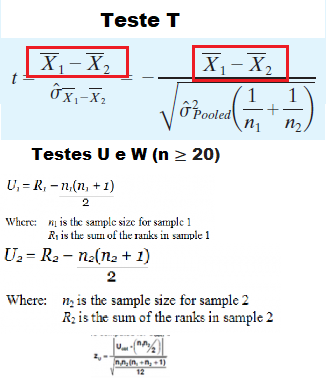

[1] "Fonte: Kirk 2008; https://www.ucl.ac.uk/child-health/"


In [1]:
library("IRdisplay")
display_png(file="Aula7_T_W.png")
print("Fonte: Kirk 2008; https://www.ucl.ac.uk/child-health/")

#### 2. Teste T de Student

Banco de dados utilizado: repasses de TVU às UFs brasileiras entre 2008-2016 (por contrato). 4463 casos. 

Desenho Teste T, para isolar as variáveis:

- recursos à governador que É de partido aliado combinado aos recursos para estado de onde ministro NÃO É originário

VS.

- recursos à governador que NÃO É de partido aliado combinado aos recursos para estado de onde ministro É originário.


In [2]:
library(tidyverse)

df_test_t <- read_csv("Aula7_analise_var_isoladas.csv")
nrow(df_test_t)
df_test_t

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Parsed with column specification:
cols(
  UF = col_character(),
  Municipio = col_character(),
  órgão_Concedente = col_character(),
  Ano_de_Vigencia = col_integer(),
  Nome_Ministro = col_character(),
  Partido_Ministro = col_character(),
  Partido_Governador = col_character(),
  Governo_Base_Aliada = col_character(),
  Partido_Ministro_Partido_Governador = col_character(),
  UFMinistro_Ufdestino = col_character(),
  Transferencia_percapita = col_double(),
  Vl_Liberado = col_double()
)


[1] 4463

UF,Municipio,órgão_Concedente,Ano_de_Vigencia,Nome_Ministro,Partido_Ministro,Partido_Governador,Governo_Base_Aliada,Partido_Ministro_Partido_Governador,UFMinistro_Ufdestino,Transferencia_percapita,Vl_Liberado
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.10144594,212000.00
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.07345260,153500.00
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.01400637,29270.27
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.07991260,167000.00
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.08005616,167300.00
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.07890771,164900.00
DF,BRASILIA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.27739132,723990.50
MS,CAMPO GRANDE,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PMDB,sim,nao,nao,2.66397148,6600000.00
CE,FORTALEZA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PSB,sim,nao,nao,0.16710299,1425398.20
CE,FORTALEZA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PSB,sim,nao,nao,0.35169749,3000000.00


Primeira visualização dos dados: problemas com outliers

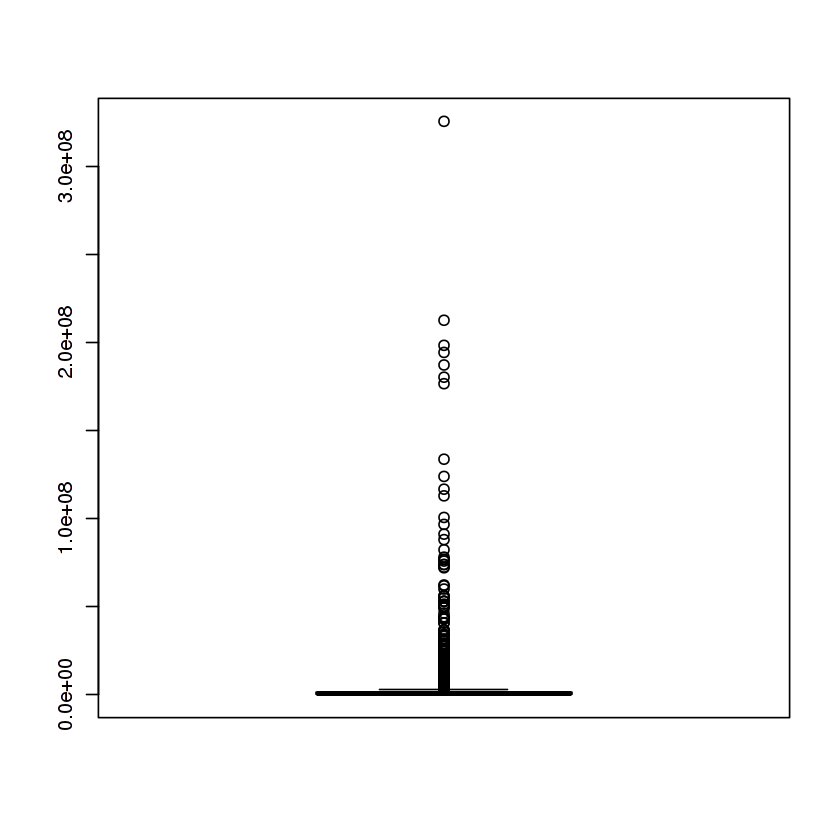

In [3]:
outliers <- boxplot(df_test_t$Vl_Liberado)$out #boxplot com a distribuição de valores liberados de TVU


Retirando os outliers: variável com normalização e remoção de outliers

In [4]:
df_test_t <- df_test_t %>% 
             mutate(Vl_LiberadoNorm = scale(df_test_t$Vl_Liberado)) #1º padronizar para aprimorar a análise e reduzir os outliers
df_test_t$Vl_LiberadoNorm

-0.20839341
-0.21355551
-0.22451766
-0.21236425
-0.21233778
-0.21254956
-0.16321486
0.35528998
-0.10132196
0.03762245
-0.17495008


In [10]:
df_test_t_limp <- df_test_t[df_test_t$Vl_Liberado < 983600, ] #2º tentando eliminar com um recurso de programação
                                                                        #Obs: eu já havia conferido que o valor de corte para
                                                                        # eliminar os outliers eram os contrat superiores a 983.600

nrow(df_test_t_limp) # avaliar o tamanho da amostra sem outliers https://www.surveymonkey.com/mp/sample-size-calculator/
df_test_t_limp


[1] 3020

UF,Municipio,órgão_Concedente,Ano_de_Vigencia,Nome_Ministro,Partido_Ministro,Partido_Governador,Governo_Base_Aliada,Partido_Ministro_Partido_Governador,UFMinistro_Ufdestino,Transferencia_percapita,Vl_Liberado,Vl_LiberadoNorm
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.10144594,212000.00,-0.2083934
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.07345260,153500.00,-0.2135555
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.01400637,29270.27,-0.2245177
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.07991260,167000.00,-0.2123643
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.08005616,167300.00,-0.2123378
SE,ARACAJU,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.07890771,164900.00,-0.2125496
DF,BRASILIA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PT,sim,sim,nao,0.27739132,723990.50,-0.1632149
CE,FORTALEZA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PSB,sim,nao,nao,0.06928441,591000.00,-0.1749501
PB,JOAO PESSOA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PSB,sim,nao,nao,0.16085672,609840.00,-0.1732876
RJ,NITEROI,MINISTERIO DO DESENVOLVIMENTO AGRARIO,2011,Afonso Florense,PT,PMDB,sim,nao,nao,0.03999221,644380.00,-0.1702398


Testando e observando a presença dos outliers...

numeric(0)

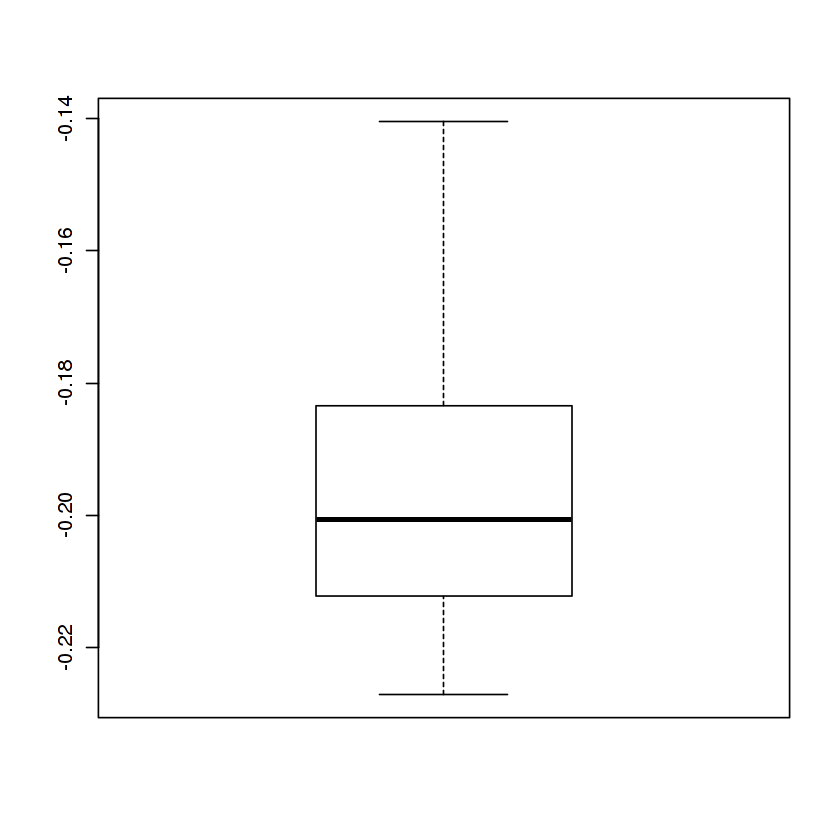

In [11]:
outliers <- boxplot(df_test_t_limp$Vl_LiberadoNorm)$out  
outliers

FINALMENTE, Teste T: o modelo basicamente comportou a variável dependente Valor Liberado (padronizado) para as variáveis independentes:

- recursos à governador que É de partido aliado combinado aos recursos para estado de onde ministro NÃO É originário

VS.

- recursos à governador que NÃO É de partido aliado combinado aos recursos para estado de onde ministro É originário.

Resultados:

In [12]:
teste_partido_uf <- t.test(Vl_LiberadoNorm ~ UFMinistro_Ufdestino, data = df_test_t_limp, var.equal = TRUE)
teste_partido_uf


	Two Sample t-test

data:  Vl_LiberadoNorm by UFMinistro_Ufdestino
t = -0.015274, df = 3018, p-value = 0.9878
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.003595952  0.003540360
sample estimates:
mean in group nao mean in group sim 
       -0.1960053        -0.1959775 


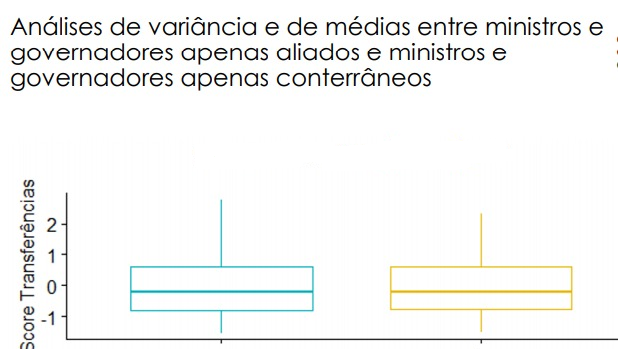

In [13]:
#(não consegui rodar aqui por conta do GGPLOT, mas vai a imagem produzida no RStudio):

library("IRdisplay")
display_png(file="Aula7_resultado_T.png")


#### 3. Testes não paramétricos U e W de Mann-Whitney

Banco de dados utilizado: repasses de TVU às UFs brasileiras entre 2008-2016 (por contrato). 6968 casos.

Desenho do Teste W, 2 análises:

1. variável independente: categórica binária, governador que é/não é do mesmo partido; variável dependente: quantitativa contínua, valores de TVU liberados. 

2. variável independente: categórica binária, recurso é para o mesmo estado (diferente estado) do ministro; variável dependente: quantitativa contínua, valores de TVU liberados.

In [14]:
library(tidyverse)
df_test_np <- read_csv("Aula7_analise_agregado.csv")

nrow(df_test_np)
df_test_np

Parsed with column specification:
cols(
  UF = col_character(),
  Municipio = col_character(),
  órgão_Concedente = col_character(),
  Ano_de_Vigencia = col_integer(),
  Partido_Ministro_Partido_Governador = col_character(),
  UFMinistro_Ufdestino = col_character(),
  Vl_Liberado = col_double()
)


[1] 6968

UF,Municipio,órgão_Concedente,Ano_de_Vigencia,Partido_Ministro_Partido_Governador,UFMinistro_Ufdestino,Vl_Liberado
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,750000.0
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,890714.9
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,353806.0
BA,SALVADOR,SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO,2011,sim,sim,5351787.1
PE,RECIFE,MINISTERIO DA INTEGRACAO NACIONAL,2012,sim,sim,17059626.3
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,595000.0
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,147915.8
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,1647000.0
BA,SALVADOR,SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO,2011,sim,sim,3603033.8
RS,PORTO ALEGRE,MINISTERIO DOS DIREITOS HUMANOS,2011,sim,sim,243660.0


In [15]:
# Análise 1:

wilcox.test(Vl_Liberado  ~ Partido_Ministro_Partido_Governador, data = df_test_np,
            exact = FALSE)

medianas_part_min_gov <- df_test_np %>%
  group_by(Partido_Ministro_Partido_Governador) %>%
  summarize(median=median(Vl_Liberado))

medianas_part_min_gov


	Wilcoxon rank sum test with continuity correction

data:  Vl_Liberado by Partido_Ministro_Partido_Governador
W = 3659400, p-value = 0.9374
alternative hypothesis: true location shift is not equal to 0


Partido_Ministro_Partido_Governador,median
nao,499428.0
sim,504377.7


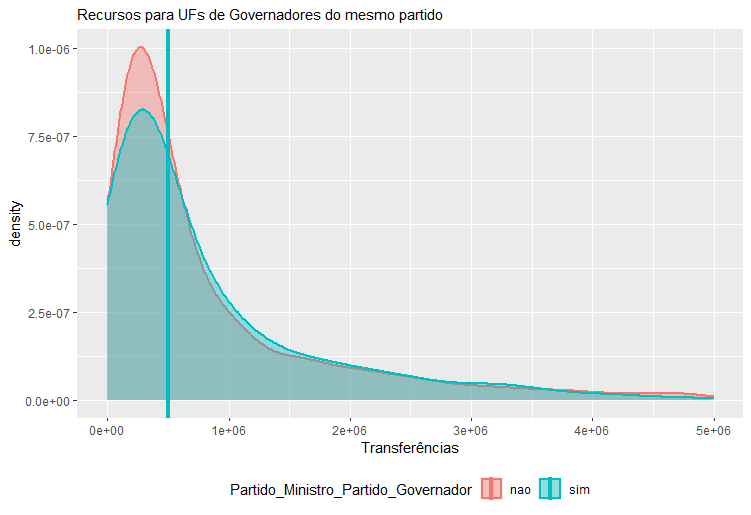

In [16]:
library("IRdisplay")
display_png(file="Aula7_resultado_NP1.png")

In [17]:
# Análise 2:

wilcox.test(Vl_Liberado ~ UFMinistro_Ufdestino, data = df_test_np,
            exact = FALSE)

medianas_estado_ministro <- df_test_np %>%
  group_by(UFMinistro_Ufdestino) %>%
  summarize(median=median(Vl_Liberado))

medianas_estado_ministro


	Wilcoxon rank sum test with continuity correction

data:  Vl_Liberado by UFMinistro_Ufdestino
W = 1244400, p-value = 0.0001187
alternative hypothesis: true location shift is not equal to 0


UFMinistro_Ufdestino,median
nao,494665.2
sim,596070.9


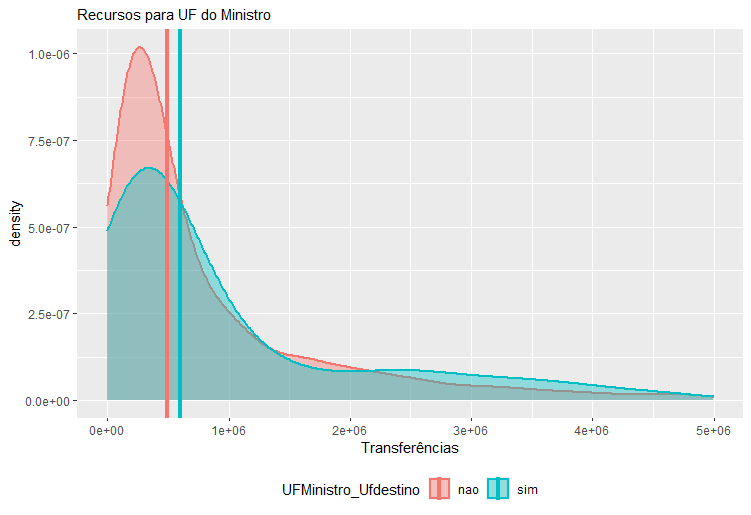

In [18]:
library("IRdisplay")
display_png(file="Aula7_resultado_NP2.png")